In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

Загрузим исходное изображение и покажем его:

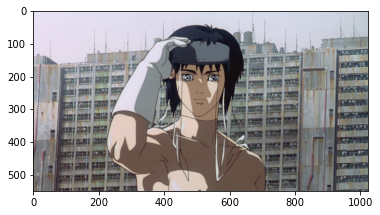

In [2]:
img = image.load_img("../input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

В данном примере всё так же используются аффинные преобразования. Используется достаточно простая матрица М, ненулевые элементы которой являются коэфициентами растяжения/сжатия по оси Х и Y. Далее применяется само пеобразование, и мы получаем новое изображение в виде матрицы  

In [4]:
def deformate_image(mat, kx_coefficient, ky_coefficient):
    height, width = mat.shape[:2]
    M_mat = np.float32([[kx_coefficient, 0, 0], [0, ky_coefficient, 0]])
    deformated_mat = cv2.warpAffine(mat, M_mat, (width, height))
    return deformated_mat

Применим вышеописанную функцию:

In [5]:
output_img_matrix = deformate_image(image_matrix, 0.8, 0.35)

Преобразуем полученную матрицу в изображение и покажем её:

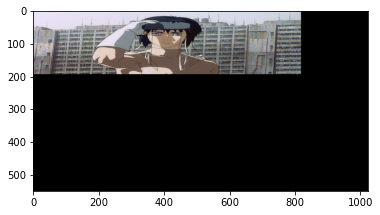

In [6]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [7]:
output_image.save("deformation_augmentation_output.jpg")

Далее, на основе написанной выше функции создадим вариант, который также будет и обрезать изображение согласно условиям:

In [8]:
def deformate_and_crop_image(mat, kx_coefficient, ky_coefficient):
    height, width = mat.shape[:2]
    M_mat = np.float32([[kx_coefficient, 0, 0], [0, ky_coefficient, 0]])
    deformated_mat = cv2.warpAffine(mat, M_mat, (int(width*kx_coefficient), int(height*ky_coefficient)))
    return deformated_mat

Применим вышеописанную функцию:

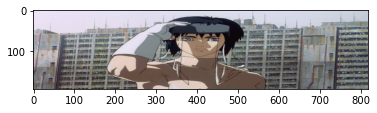

In [9]:
output_img_matrix =deformate_and_crop_image(image_matrix, 0.8, 0.35)
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [10]:
output_image.save("deformation_augmentation_output_cropped.jpg")